<Axes: >

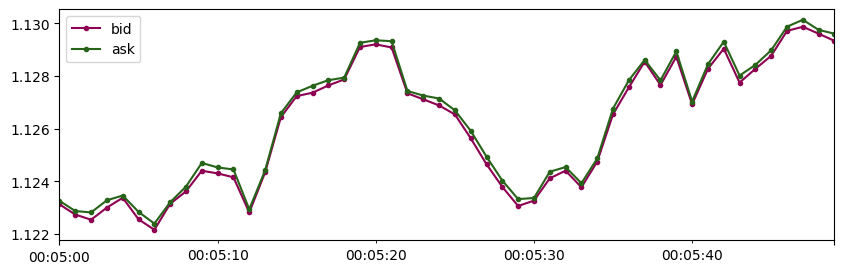

In [16]:
from datetime import datetime
import pandas as pd
from synthetick.Synthetick import Ticks

DATE_FROM: datetime = pd.to_datetime("2023-01-01 00:00:00")
DATE_TO: datetime = pd.to_datetime("2023-02-01 00:00:00")
  
tick_data_generator = Ticks(trend=0.01,
                            volatility_range=10,
                            spread_min=0.5,
                            spread_max=3,
                            pip_position=-4,
                            remove_weekend=True)

tick_data_generator._compute_date_range(date_from=DATE_FROM,
                                        date_to=DATE_TO,
                                        frequency="1s",
                                        init_value=1.1300)

tick_data_generator.price_time_series.to_csv("test_tick_happy_path.csv", index_label="date-time")

tick_data_generator.price_time_series[300:350][["bid", "ask"]].plot(figsize=(10,3), marker=".", cmap="PiYG")

## OHLC

In [1]:
from datetime import datetime
import pandas as pd
from synthetick.Synthetick import OHLC

DATE_FROM: datetime = pd.to_datetime("2023-01-01 00:00:00")
DATE_TO: datetime = pd.to_datetime("2023-02-01 00:00:00")

ohlc: OHLC = OHLC(trend=0.0001,
                  volatility_range=10,
                  spread_min=0.5,
                  spread_max=3,
                  pip_position=-4,
                  remove_weekend=True,
                  tick_frequency="1s",
                  time_frame="H")

ohlc.produce(date_from=DATE_FROM, date_to=DATE_TO, init_value=1.300)
ohlc.ohlc_time_series["bid"].to_csv("ohlc_bid_1h.csv", index_label="date-time")